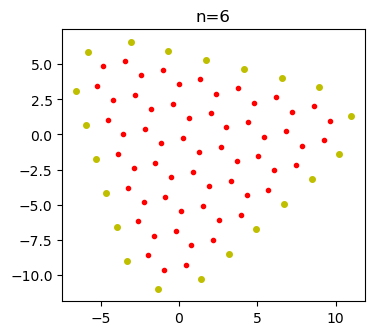

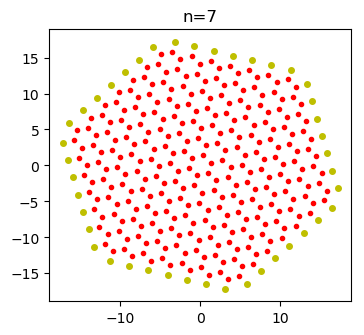

#Carbonos=46.000000
Sum(Diag(P))=46.000000


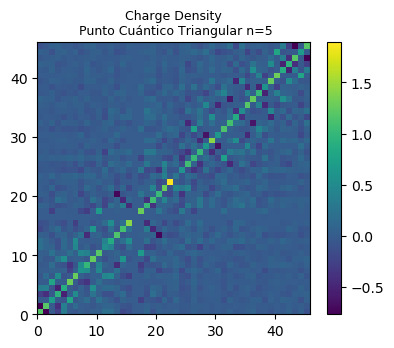

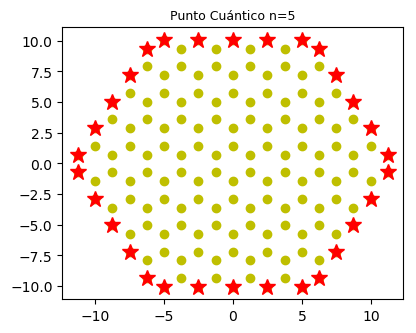

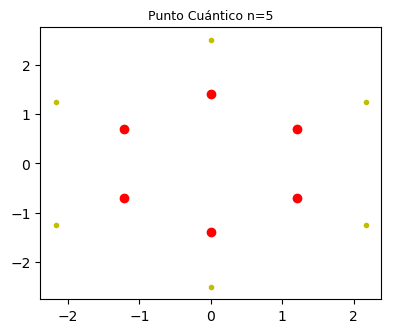

64
XYZ
C	0	5.76	0.0
C	-1.2470765814495914	5.04	0.0
C	1.2470765814495914	5.04	0.0
C	-1.2470765814495914	3.6	0.0
C	1.2470765814495914	3.6	0.0
C	-2.494153162899183	2.88	0.0
C	0.0	2.88	0.0
C	2.494153162899183	2.88	0.0
continua...


In [1]:
# Importando paquetes
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
from importnb import Notebook

import matplotlib.pyplot as plt
with Notebook(): import Functions_TB
from Functions_TB import (punto_cuantico,
                          readfile, getT, getH,
                          ChargeDensity,
                          grafica1, grafica2, grafica3)

# 1. Benceno
+ Cálculo de energías a partir de las coordenadas en un archivo.

#Carbonos=6.000000
Sum(Diag(P))=6.000000


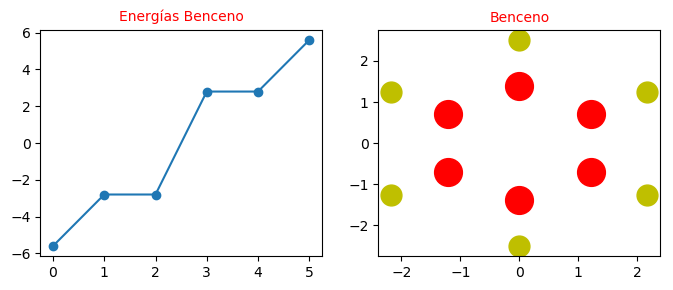

In [2]:
# Genera coordenadas
atom, coords = readfile("benzene.xyz")
x, y,z = coords

# Genera energias
t = -2.8
T = getT(atom, coords, t=t)
E, eigvec = np.linalg.eigh(T)
P = ChargeDensity(atom, coords) # Charge Density

# Grafica
grafica1(E,x,y,atom)

# 2. Punto cuántico triangular (n=5)
+ Cálculo de energías a partir de las coordenadas en un punto cuántico triangular (n).

#Carbonos=46.000000
Sum(Diag(P))=46.000000


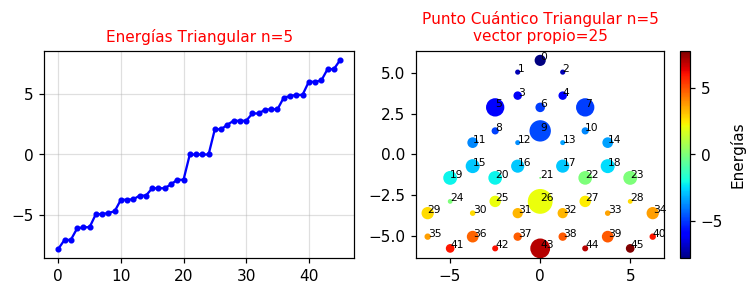

In [3]:
# Genera coordenadas
n=5
PCT = punto_cuantico(n).Triangular()
atom, coords = np.array(PCT.atomos), PCT.coords
x, y, z = np.array(coords)


# Genera energias
T = getT(atom, coords, t=-2.8)
E, eigvec = np.linalg.eigh(T)
P = ChargeDensity(atom, coords) # Charge Density

# Grafica.
#-------------------------------------------------------------------------
grafica2(n, E, eigvec, x, y, atom, eig=25)

## 3. Punto cuánticos triangulares (n=1,2,...,20)
+ Cálculo de energías a partir de las coordenadas en vatios puntos cuánticos triangulares (diferentes n).

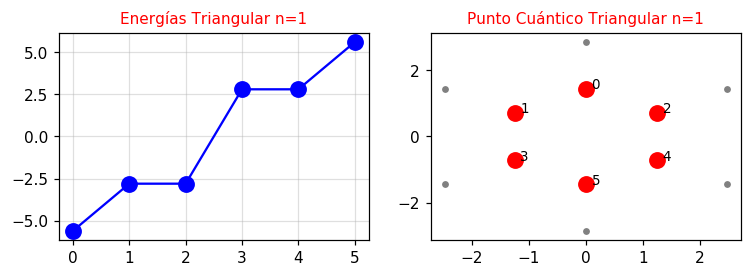

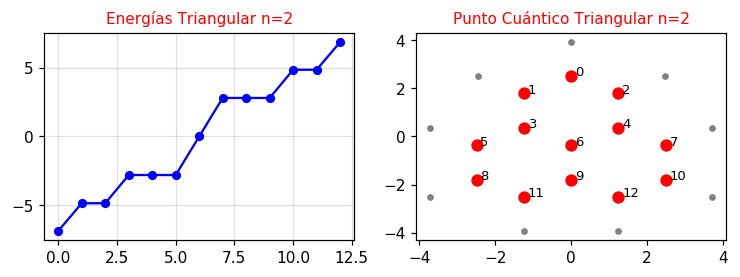

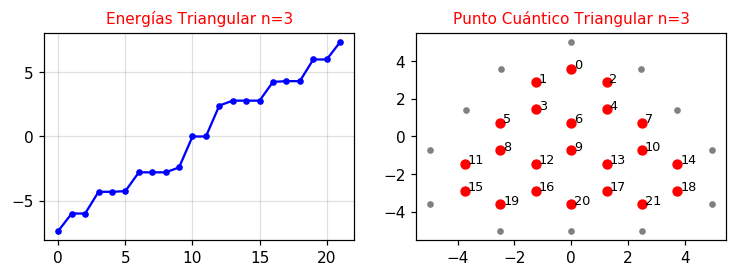

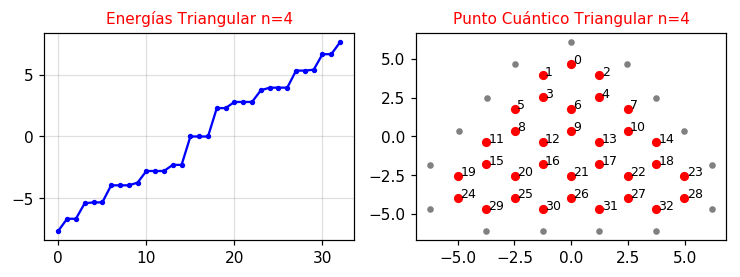

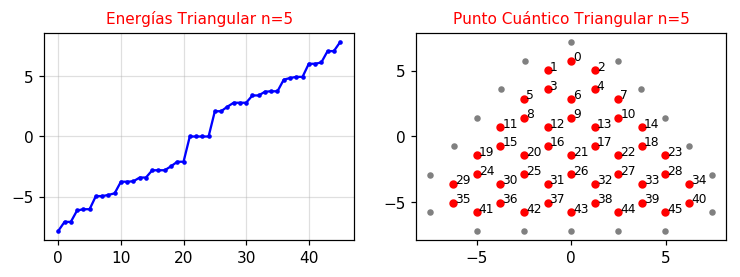

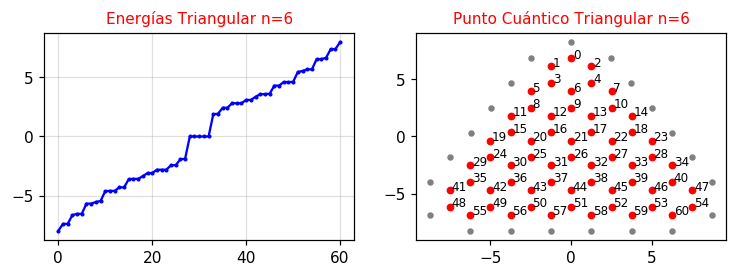

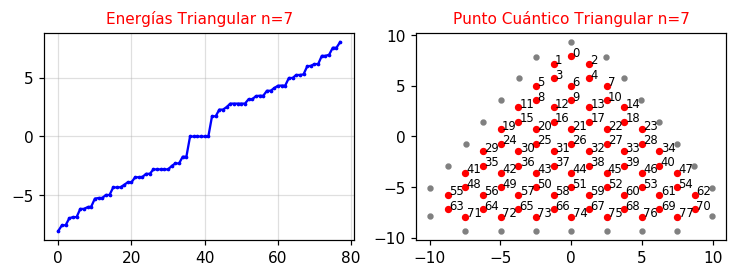

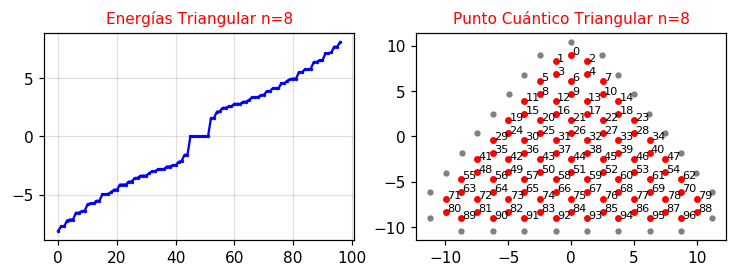

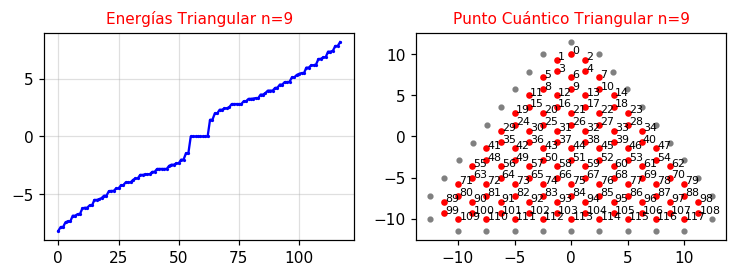

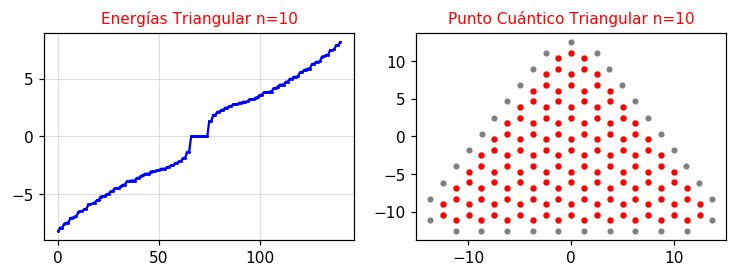

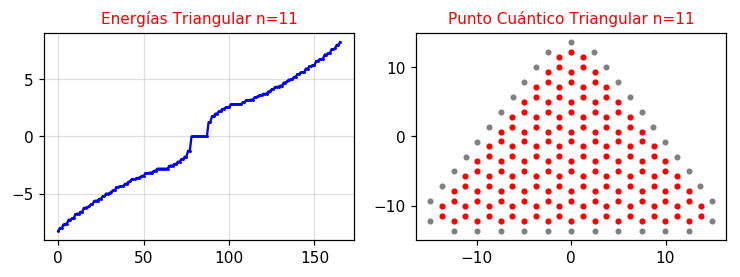

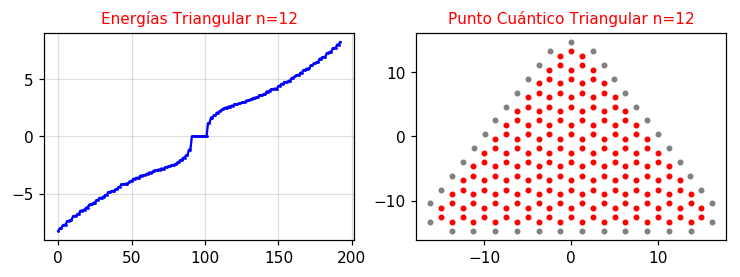

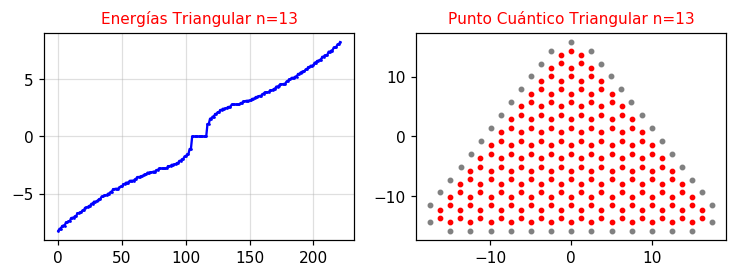

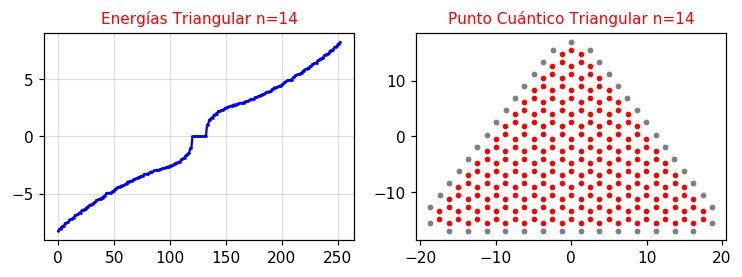

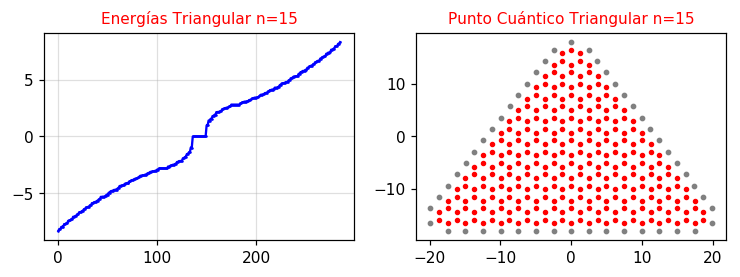

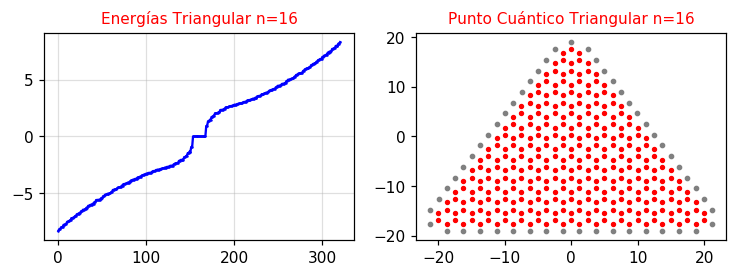

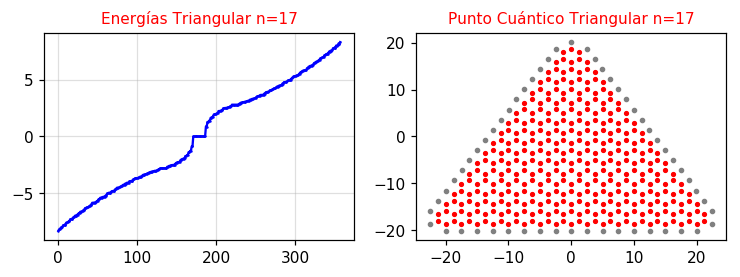

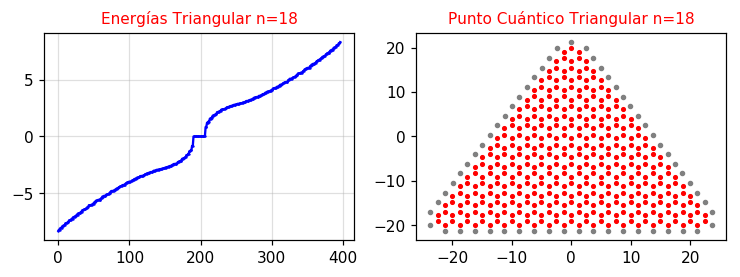

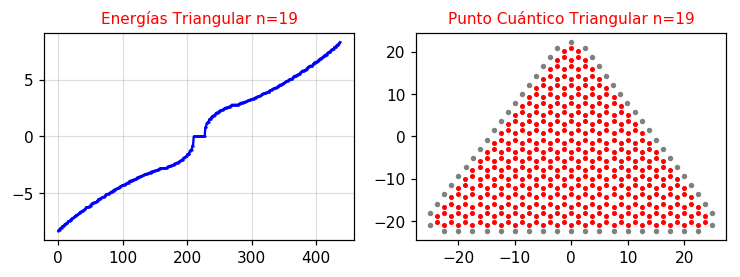

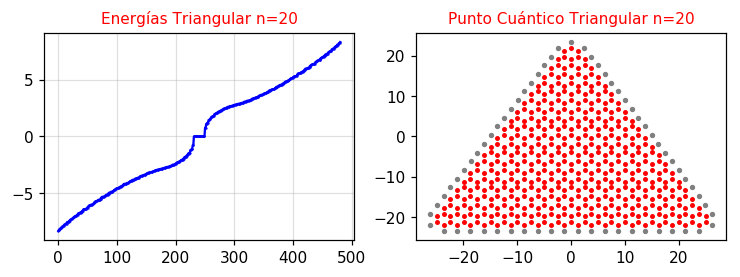

In [4]:
t = -2.8
for i in range(1,21):
    PCT = punto_cuantico(i, addH=True).Triangular()
    atom, coords = np.array(PCT.atomos), PCT.coords
    x, y, z = np.array(coords)
    
    T = getT(atom, coords, t=t)
    E, eigvec = np.linalg.eigh(T)
    E= np.sort(E)

    # Grafica.
    grafica3(i,E,x,y,atom)

# 4. Dos puntos cuánticos triangulares superpuestos.

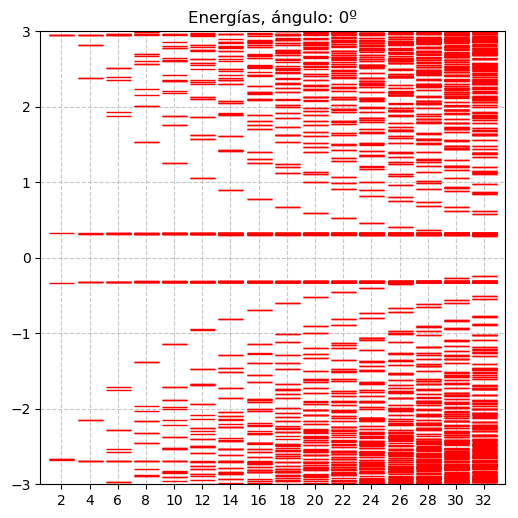

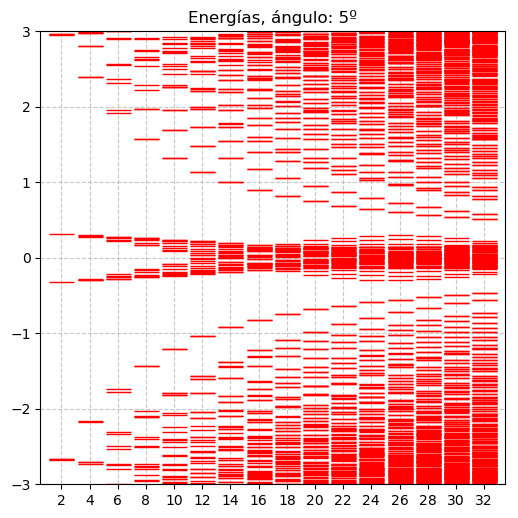

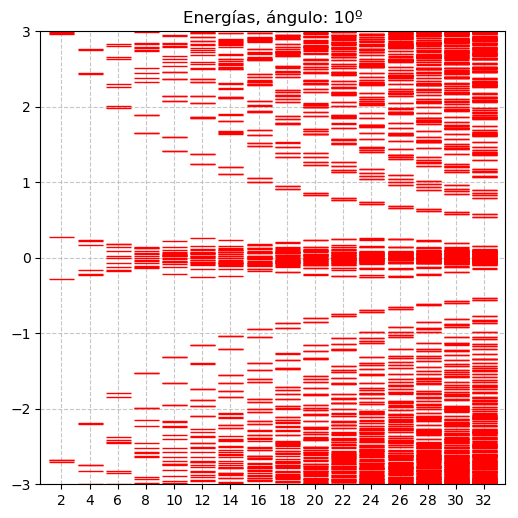

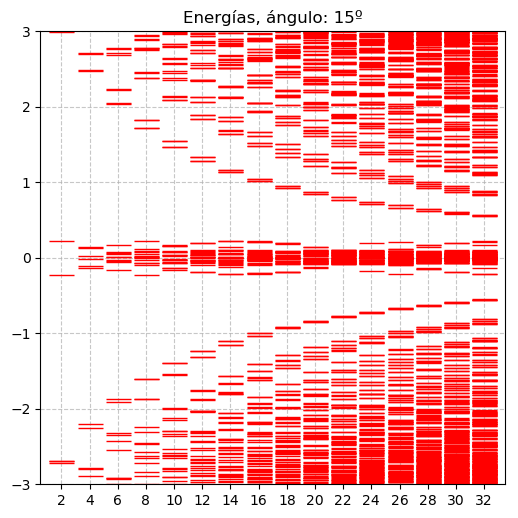

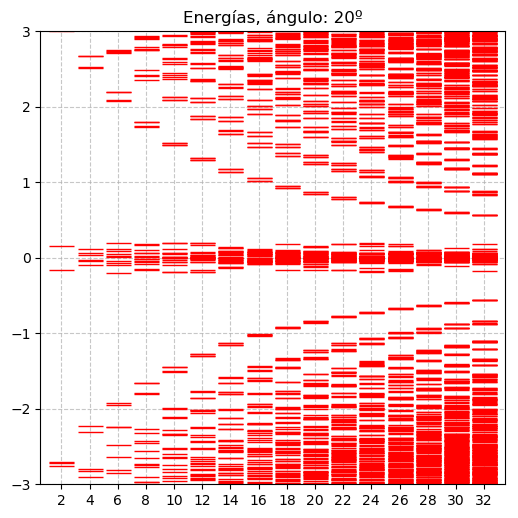

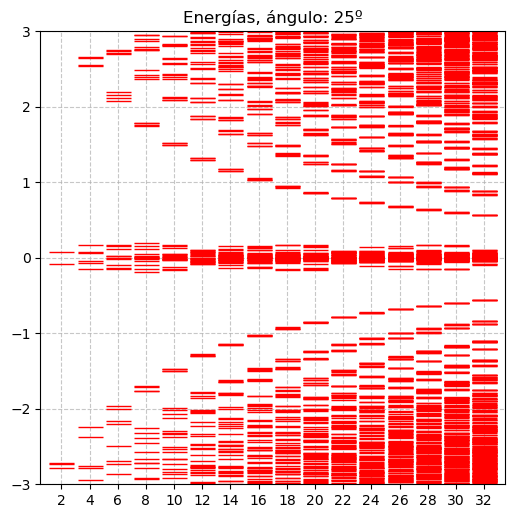

In [5]:
for alpha in [0, 5, 10, 15, 20, 25]:
    fig = plt.figure(figsize=(6,6), dpi=100)
    plt.title(u"Energías, ángulo: "+str(alpha)+u"º")
    nn=34
    for n in range(2, nn, 2):
        # Uniendo coordenadas de dos puntos cuanticos triangulares.
        PCT = punto_cuantico(n, d=0.0, addH=False).Triangular()
        atom1, coords1 = np.array(PCT.atomos), np.transpose(PCT.coords)
        
        PCT = punto_cuantico(n, d=3.3, ang=np.deg2rad(alpha), addH=False).Triangular()
        atom2, coords2 = np.array(PCT.atomos), np.transpose(PCT.coords)
        
        coords = np.transpose(list(coords1) + list(coords2))
        atom = np.array(list(atom1) + list(atom2))
        
        #Calculo de energias
        H=getH(atom, coords, t=-3.16, gamma=-0.39, Beta=3.)
        E, eigvec = np.linalg.eigh(H)
        
        #Grafica
        plt.plot(np.zeros(len(H))+n, E, "_r", ms=18)
    plt.grid(alpha=0.7, ls='--')
    plt.xticks(range(2,nn,2))
    plt.ylim(-3,3)
    plt.show()

# 5. Vacantes

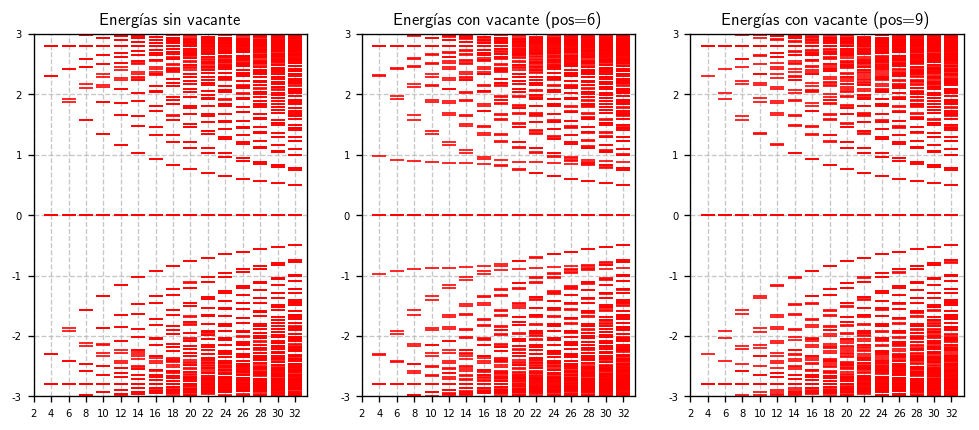

In [6]:
# Calculo de Energias para un benceno sin vacante.
def Energias(n, vacante=False):
    PCT = punto_cuantico(n, d=0.0, addH=False).Triangular()
    atom, coords = PCT.atomos, list(np.transpose(PCT.coords))
    if vacante!=False:
        atom.pop(vacante)
        coords.pop(vacante)
    coords = np.transpose(coords)
    H=getT(atom, coords, t=-2.8)
    E, eigvec = np.linalg.eigh(H)
    return E, atom, coords

# Grafica --------------------------------------------------------------
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(10,4), dpi=120, ncols=3)
ax1.set_title(u'Energías sin vacante', fontsize=10, usetex=True)
ax2.set_title(u'Energías con vacante (pos=6)', fontsize=10, usetex=True)
ax3.set_title(u'Energías con vacante (pos=9)', fontsize=10, usetex=True)

nn=34
for n in range(4,nn,2):    
    # Sin vacante.
    E1, atom1, coords1 = Energias(n)
    ax1.plot(np.zeros(len(E1))+n, E1, "_r", ms=8)
    
    # Con vacante pos (6)
    E2, atom2, coords2 = Energias(n, vacante=6)
    ax2.plot(np.zeros(len(E2))+n, E2, "_r", ms=8)
    
    # Con vacante pos (9)
    E3, atom3, coords3 = Energias(n, vacante=9)
    ax3.plot(np.zeros(len(E3))+n, E3, "_r", ms=8)

for ax in [ax1, ax2, ax3]:
    ax.grid(alpha=0.7, ls='--')
    ax.set_xticks(range(2,nn,2))
    ax.set_xticklabels(range(2,nn,2), fontsize=6)
    ax.set_ylim(-3,3)
    ax.set_yticks(range(-3,4))
    ax.set_yticklabels(range(-3,4), fontsize=6)